# **Desafio: Sprint 03 - Resolução**

## **Desenvolvimento**


### **Etapa 1:**

**O que foi pedido:** Leia o arquivo csv [*googleplaystore.csv*](../../Sprint3/Desafio/googleplaystore.csv) e realize as seguintes atividades sobre o dataset utilizando as bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas.

In [12]:
# Importa a BIBLIOTECA pandas e usa um ALIAS pd para referência
import pandas as pd

# Lê o arquivo googlepalystore.csv e armazena na variável dataset
dataset = pd.read_csv('googleplaystore.csv')

# A variável dataset_limpo recebe o conteúdo de dataset SEM linhas duplicadas
dataset_limpo = dataset.drop_duplicates()

# Crio outro arquivo para receber o googleplaystore.csv sem linhas duplicadados e nomeio ele como 'googleplaystoreAtt.csv' (Att = Atualizado)
dataset_limpo.to_csv('googleplaystoreAtt.csv', index=False)

**Resolução:** Após a execução com sucesso do código o arquivo [*googleplaystoreAtt.csv*](../../Sprint3/Desafio/googleplaystoreAtt.csv), que basicamente, é o mesmo arquivo que o [*googleplaystore.csv*](../../Sprint3/Desafio/googleplaystore.csv), mas SEM linhas duplicadas

### **Etapa 2:**

**O que foi pedido:** Faça um gráfico de barras contendo os top 5 apps por número de instalação.

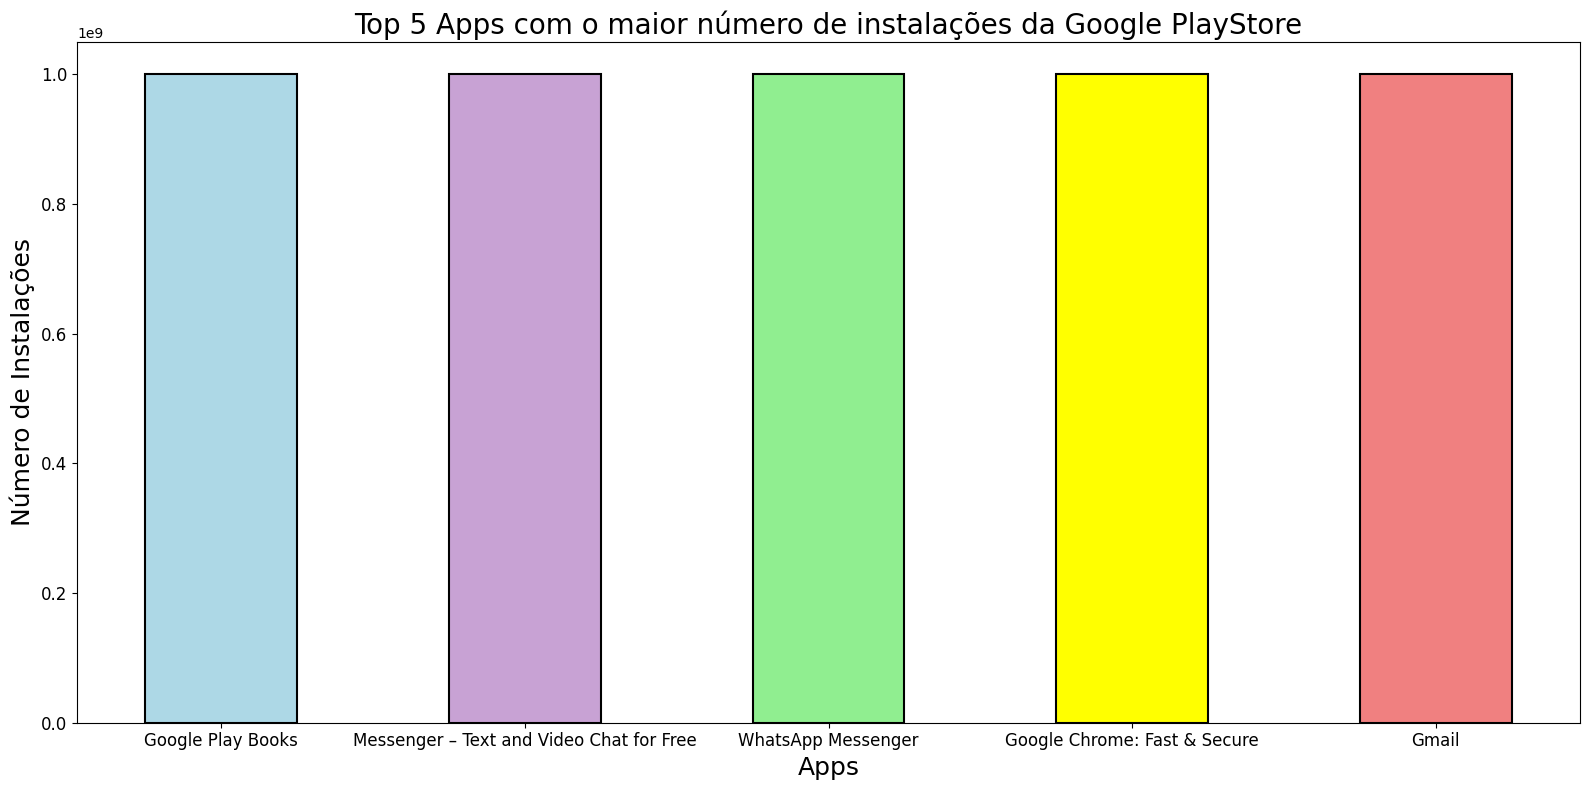

In [ ]:
# Importa as BIBLIOTECAS pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Verifica se o conteúdo armazenado na coluna Installs possui algum caracter especial e é um número, caso tenha substitui por uma string vazia
dataset = dataset[dataset['Installs'].str.replace('[+,]', '', regex=True).str.isdigit()]

# Faz basicamente a mesma coisa que o código anterior, mas garante que os valores serão convertidos para float
dataset['Installs'] = dataset['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Armazena os 5 maiores valores da coluna Installs, na variável topCincoNumInstalacoes
topCincoNumInstalacoes = dataset.nlargest(5, 'Installs')

# Crio um dicionário que tem como key o nome do app e o value como o número de instalações que app teve
topCincoAppsMaisInstalacoes = dict(zip(topCincoNumInstalacoes['App'], topCincoNumInstalacoes['Installs']))

# Aqui utilizo o mathplotlib para plotar o gráfico com os 5 apps com maior número de instalações, com suas devidas especificações visuais
plt.figure(figsize=(16, 8))
cores = ['lightblue', '#C8A2D4', 'lightgreen', 'yellow', 'lightcoral']
plt.bar(topCincoAppsMaisInstalacoes.keys(), topCincoAppsMaisInstalacoes.values(), color=cores, width=0.5, edgecolor = 'black', linewidth = 1.5)
plt.title('Top 5 Apps com o maior número de instalações da Google PlayStore', fontsize = 20)
plt.xlabel('Apps', fontsize = 18)
plt.ylabel('Número de Instalações', fontsize = 18)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Resolução:** Após a execução bem-sucedida do código, o gráfico intitulado *'Top 5 Apps com o maior número de instalações da Google PlayStore'* é gerado. No eixo X, os nomes dos aplicativos são usados como rótulos, enquanto no eixo Y são representados os números de instalações. Cada barra é colorida de forma distinta, de acordo com a identidade visual dos aplicativos, proporcionando uma diferenciação visual clara para o usuário.

### **Etapa 3:**

**O que foi pedido:** Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frêquencia em que elas aparecem.

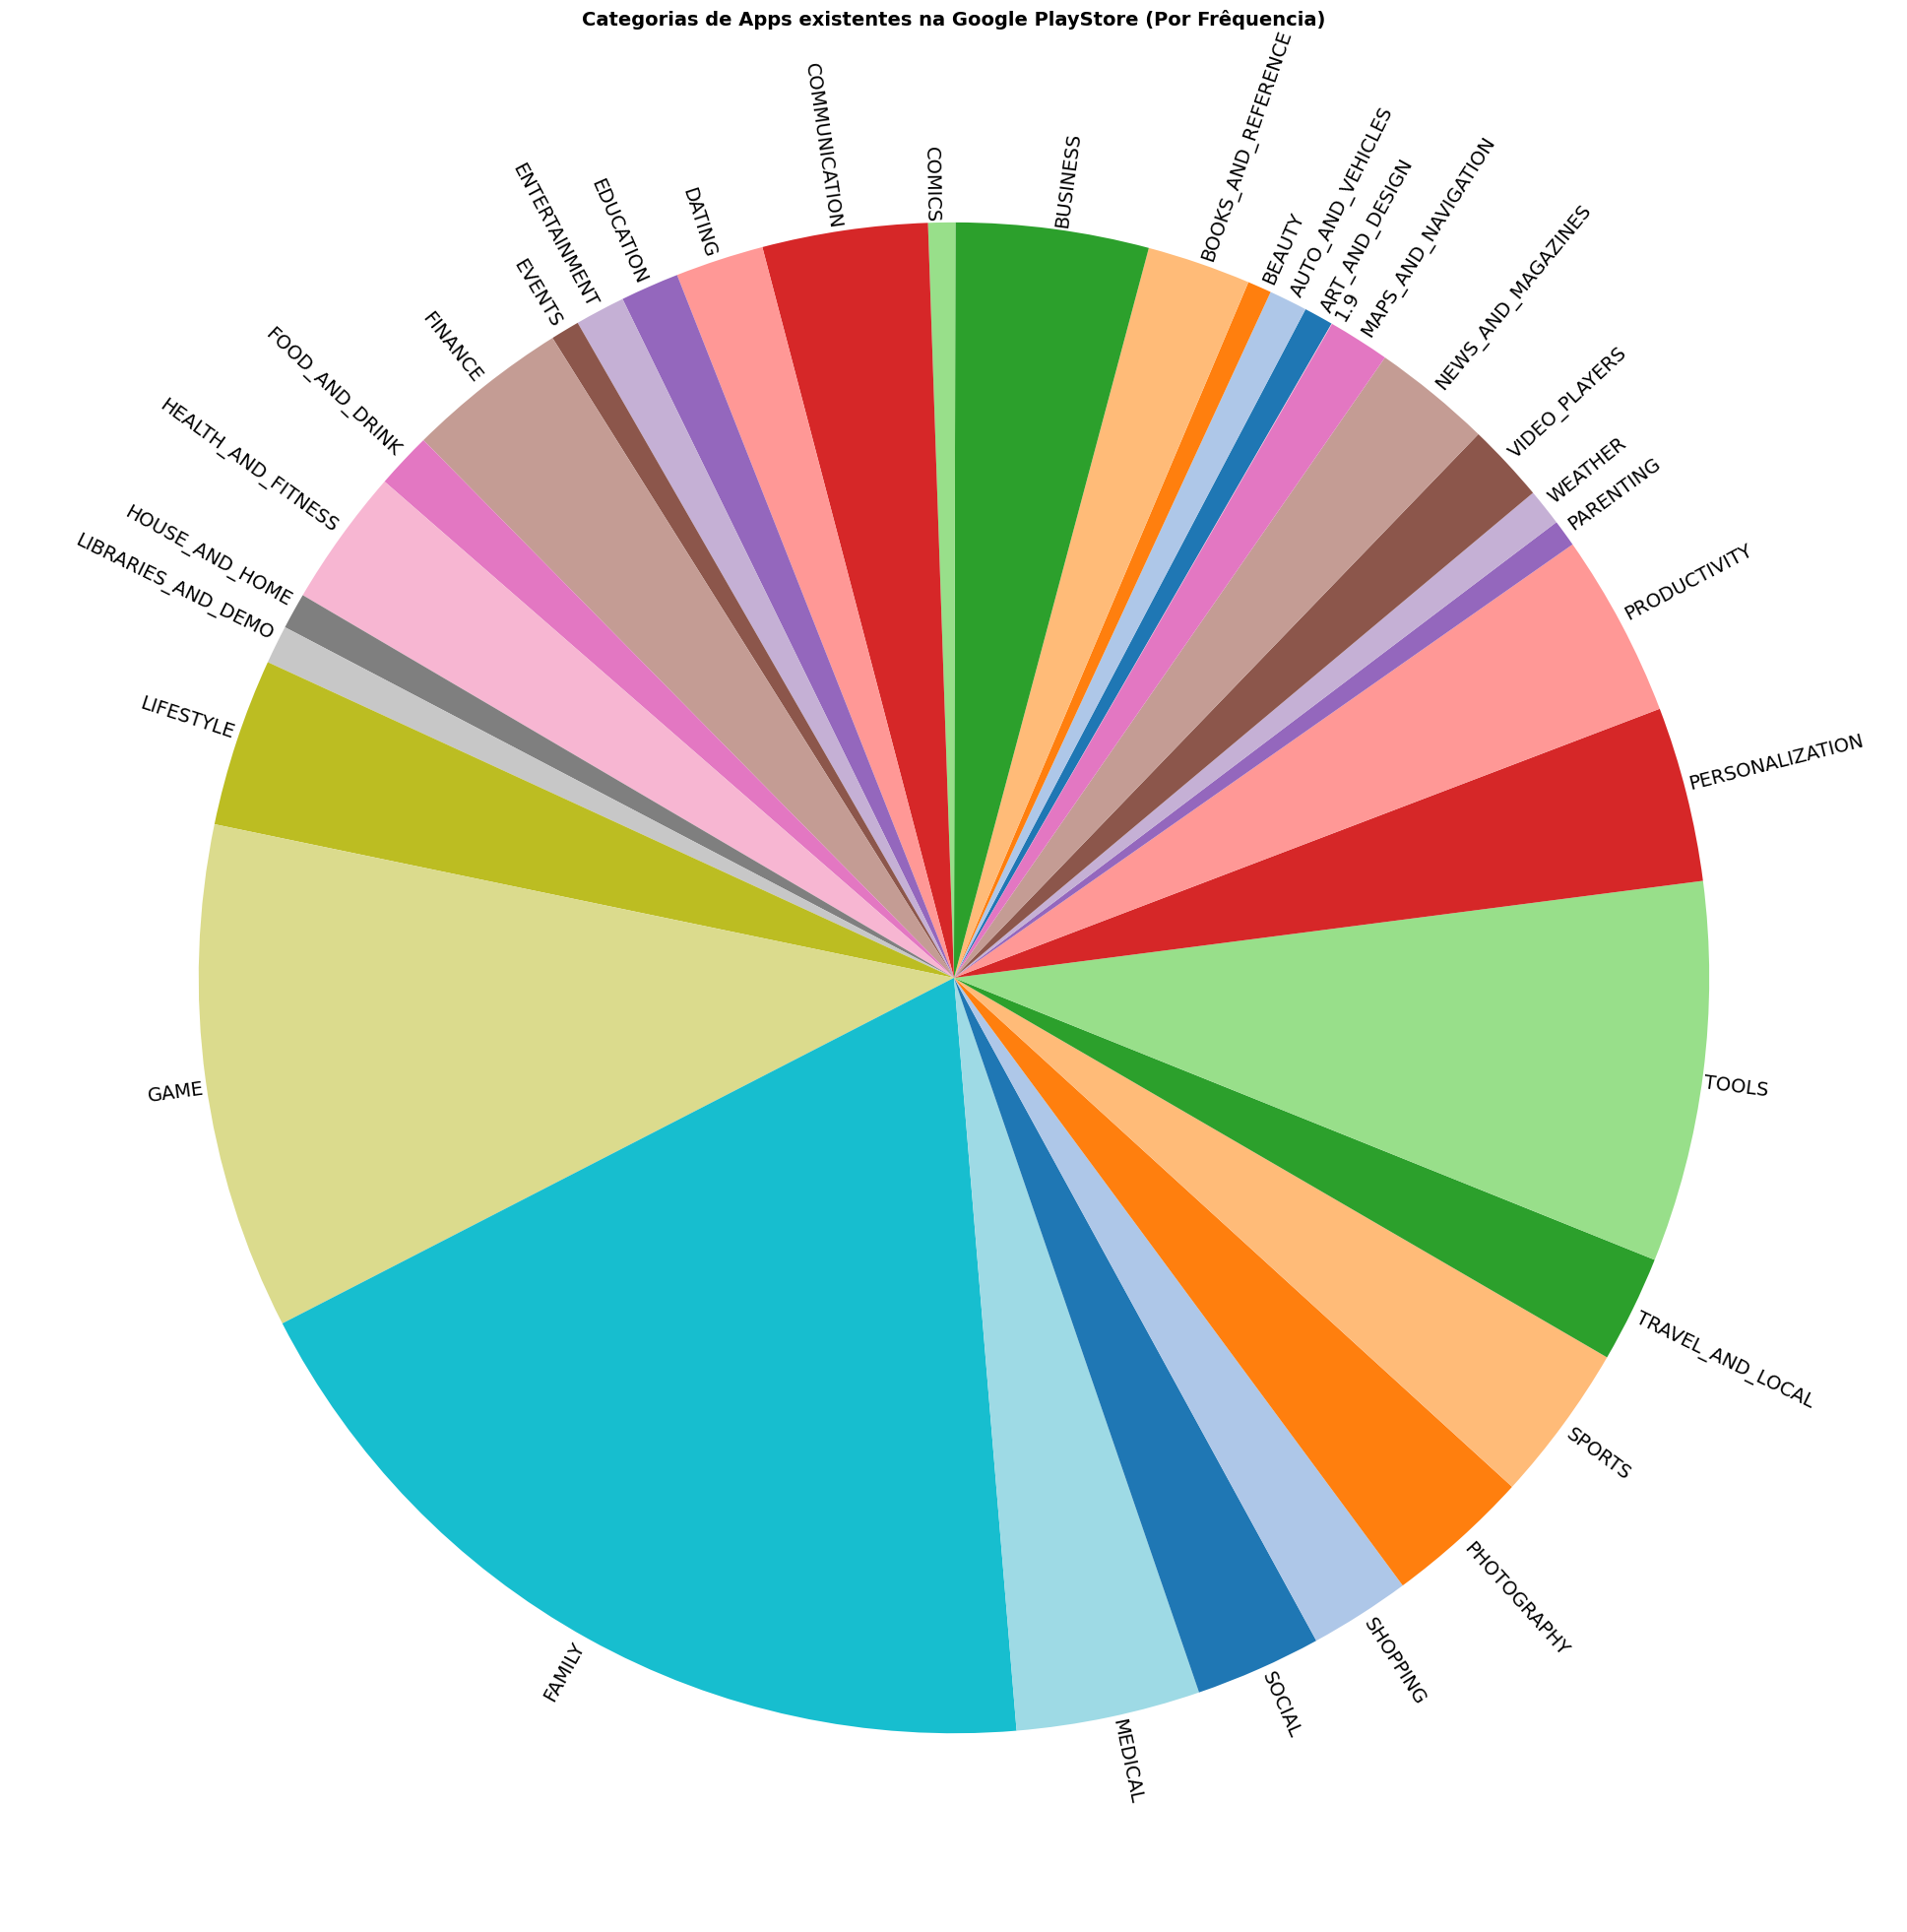

In [158]:
# Importo as BIBLIOTECAS pandas, matplotlib e seaborn para a construção do gráfico
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lê o arquivo googlepalystoreAtt.csv e armazena na variável dataset 
dataset = pd.read_csv('googleplaystoreAtt.csv')

# Crio um dicionário chamado de aparicoes para receber a categoria como key e o número de aparições como Value
aparicoes = {}

# Passo por todos os valores da coluna categoria, adicionando as categorias como chave ou somando 1 ao número de aparições da categoria
for categorias in dataset['Category']:
    if categorias in aparicoes.keys():
        aparicoes[categorias] += 1
    else:
        aparicoes[categorias] = 1

# Crio uma paleta de cores com o número de chaves do dicionário aparicoes
num_cores = len(aparicoes)
cores = sns.color_palette('tab20', num_cores)

# Aqui utilizo o mathplotlib para plotar o gráfico de pizza com as categorias de apps existentes na google playstore, por frêquencia
plt.figure(figsize=(100, 20))
plt.title('Categorias de Apps existentes na Google PlayStore (Por Frêquencia)', fontsize = 14, fontweight='bold')
plt.pie(aparicoes.values(), labels=aparicoes.keys(), startangle=60, labeldistance=1, rotatelabels=True, textprops={'fontsize': 14}, colors=cores)
plt.tight_layout()
plt.show()


**Resolução:** Após a execução bem-sucedida, o gráfico de pizza entitulado de *Categorias de Apps existentes na Google PlayStore (Por Frêquencia)* é gerado. Aqui vemos 33 categorias de Apps, quanto maior sua *'fatia'* maior o número de vezes em que a categoria aparece num App. Optei por não usar porcentagens para identificar o gráfico, pois acho que visualmente é a melhor escolha.

### **Etapa 4:**

**O que foi pedido:** Mostre qual o app mais caro existente no dataset.